In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/201415-laliga-basicplayerstats/All_14-15_LaLiga.csv
/kaggle/input/bundesliga-players-1718-basicstats/All_Bundesliga 17-18.csv


In [2]:
laliga = pd.read_csv('/kaggle/input/201415-laliga-basicplayerstats/All_14-15_LaLiga.csv',index_col = 'Rk')
laliga.head()

,Player,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,...,G-PK,PK,PKatt,CrdY,CrdR,Gls/90,Ast/90,G+A/90,G-PK//90,G+A-PK/90
Rk,,,,,,,,,,,,,,,,,,,,,
1,Luis Suárez,FW,Barcelona,27,1987,27,25,2159,24.0,16,...,16,0,0,4,0,0.67,0.54,1.21,0.67,1.21
2,James Rodríguez,FWMF,Real Madrid,23,1991,29,29,2265,25.2,13,...,13,0,0,5,0,0.52,0.52,1.03,0.52,1.03
3,Lionel Messi,FWMF,Barcelona,27,1987,38,37,3375,37.5,43,...,38,5,6,4,0,1.15,0.48,1.63,1.01,1.49
4,Denis Cheryshev,FWMF,Villarreal,23,1990,26,18,1687,18.7,4,...,4,0,0,7,0,0.21,0.48,0.69,0.21,0.69
5,Cristiano Ronaldo,FWMF,Real Madrid,29,1985,35,35,3100,34.4,48,...,38,10,12,5,1,1.39,0.46,1.86,1.10,1.57


<AxesSubplot:ylabel='Player'>

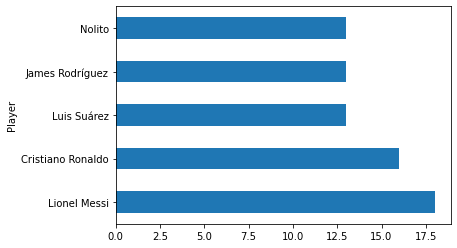

In [3]:
laliga[laliga['90s'] > 23].nlargest(5,['Ast']).plot.barh(x='Player' , y= 'Ast',legend=False)

<AxesSubplot:xlabel='G+A/90', ylabel='Player'>

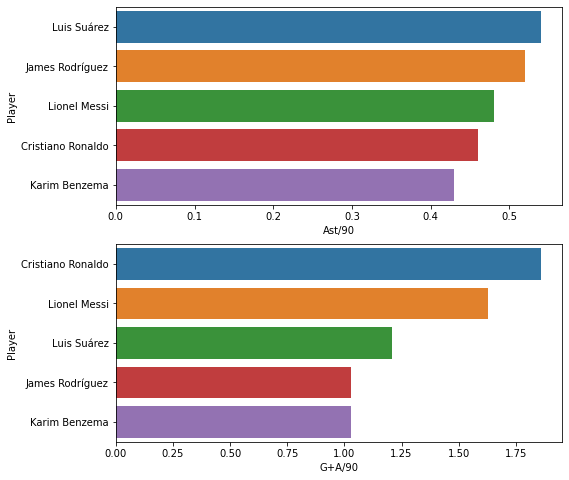

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
sns.barplot(data=laliga[laliga['90s'] > 23].nlargest(5,'Ast/90') , x = 'Ast/90' , y='Player' ,ax=ax1)
sns.barplot(data=laliga[laliga['90s'] > 23].nlargest(5,'G+A/90') , x = 'G+A/90' , y='Player' ,ax=ax2)

In [5]:
laliga['90s'].median()

23.0

In [6]:
bundesliga = pd.read_csv('/kaggle/input/bundesliga-players-1718-basicstats/All_Bundesliga 17-18.csv'
                         ,index_col = "Rk")
bundesliga.head()

,Player,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,...,G+A-PK/90,xG,npxG,xA,npxG+xA,xG/90,xA/90,xG+xA/90,npxG/90,npxG+xA/90
Rk,,,,,,,,,,,,,,,,,,,,,
1,Thomas Müller,FWMF,Bayern Munich,27,1989,29,22,2005,22.3,8,...,0.99,6.7,6.7,8.9,15.5,0.31,0.41,0.71,0.31,0.71
2,James Rodríguez,MF,Bayern Munich,26,1991,23,19,1621,18.0,7,...,1.00,4.2,4.2,7.5,11.6,0.23,0.41,0.65,0.23,0.65
3,André Schürrle,FW,Dortmund,26,1990,18,11,1236,13.7,1,...,0.51,4.6,3.8,2.3,6.2,0.33,0.17,0.51,0.28,0.45
4,Joshua Kimmich,DF,Bayern Munich,22,1995,29,26,2329,25.9,1,...,0.43,0.6,0.6,5.8,6.4,0.02,0.22,0.25,0.02,0.25
5,Philipp Max,DF,Augsburg,23,1993,33,33,2959,32.9,2,...,0.43,1.1,1.1,8.8,9.8,0.03,0.27,0.30,0.03,0.30


In [7]:
bundesliga['90s'].median()

21.6

<AxesSubplot:xlabel='G+A/90', ylabel='Player'>

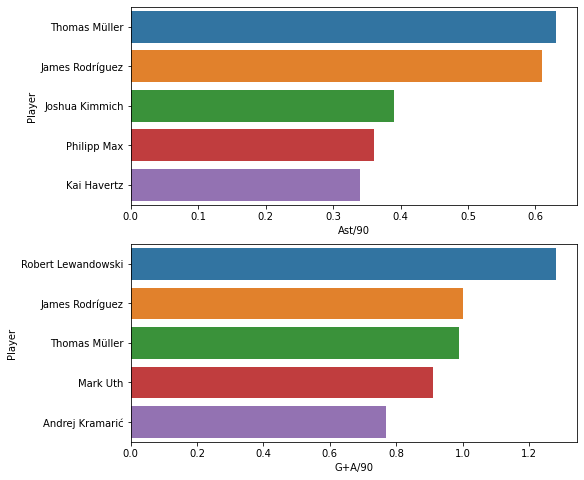

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
sns.barplot(data=bundesliga[bundesliga['90s'] > 17].nlargest(5,'Ast/90') , x = 'Ast/90' , y='Player' ,ax=ax1)
sns.barplot(data=bundesliga[bundesliga['90s'] > 17].nlargest(5,'G+A/90') , x = 'G+A/90' , y='Player' ,ax=ax2)

<AxesSubplot:xlabel='xG+xA/90', ylabel='G+A/90'>

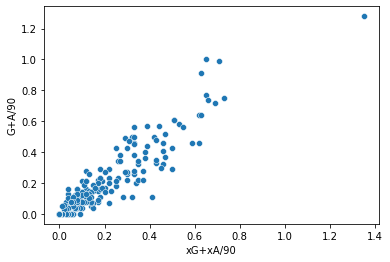

In [9]:
sns.scatterplot(data=bundesliga[bundesliga['90s'] > 17] , x = 'xG+xA/90' , y='G+A/90')

In [10]:
bundesliga[bundesliga['90s'] > 17].index

Int64Index([  1,   2,   4,   5,   7,   8,   9,  12,  15,  18,
            ...
            255, 256, 257, 258, 259, 260, 261, 262, 263, 265],
           dtype='int64', name='Rk', length=189)

In [11]:
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
fig = px.scatter(bundesliga[bundesliga['90s'] > 17] , x = 'xG+xA/90' , y='G+A/90',
                 opacity=[1], 
                 #range_x = (17,37),range_y=(0,400000),
                 size='90s',
                 template = 'plotly_white' , hover_data=['Player','Squad' ,'Age'])
fig.update_traces(marker = dict(color=['black','red']))
fig.layout.showlegend=False
fig.show()
fig.write_html("./james.html")